Практическая часть

In [159]:
from typing import List, Tuple
import math
import random
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import csv

Сделаем класс матриц(добавил пару методов к старой лабе)

In [74]:
class Matrix:

    def __init__(self, data): #создание
        if not all(len(row) == len(data[0]) for row in data):
            raise ValueError("строки должны быть одинаковой длины")
        self.data = data
        self.rows = len(data)
        self.cols = len(data[0]) if self.rows > 0 else 0


    def __getitem__(self, indices):
        i, j = indices
        return self.data[i][j]


    def add(self, other): #сложение
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("разный размер матриц")
        result = [[self.data[i][j] + other.data[i][j] for j in range(self.cols)]for i in range(self.rows)]
        return Matrix(result)


    def __sub__(self, other): # a - b
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("разные матрицы")
        result = [
            [self.data[i][j] - other.data[i][j] for j in range(self.cols)]
            for i in range(self.rows)
        ]
        return Matrix(result)


    def __mul__(self, sc): # умножаем на сколяр
        return Matrix([
            [elem * sc for elem in row]
            for row in self.data
        ])


    def __matmul__(self, other): #умножение @
        if self.cols != other.rows:
            raise ValueError("ошибка")
        result = [[sum(a * b for a, b in zip(self.get_row(i), other.get_col(j)))for j in range(other.cols)]for i in range(self.rows)]
        return Matrix(result)


    def trans(self): #транс
        return Matrix([list(col) for col in zip(*self.data)])


    def minor(self, row, col): #минор
        if self.rows != self.cols:
            raise ValueError("матрица не квадратная")
        new_data = [
            r[:col] + r[col + 1:]
            for i, r in enumerate(self.data)
            if i != row
        ]
        return Matrix(new_data)


    def det_g(self):  # вычисление детерминанта по Гауссу
      if self.rows != self.cols:
          raise ValueError("матрица не квадратная")

      new_mat = [row.copy() for row in self.data]
      n = self.rows
      det = 1.0

      for i in range(n):
        pivot_row = max(range(i, n), key=lambda x: abs(new_mat[x][i]))
        if abs(new_mat[pivot_row][i]) < 1e-100:
            return 0.0

        if pivot_row != i:
            new_mat[i], new_mat[pivot_row] = new_mat[pivot_row], new_mat[i]
            det *= -1

        det *= new_mat[i][i]
        for j in range(i + 1, n):
            factor = new_mat[j][i] / new_mat[i][i]
            for k in range(i, n):
                new_mat[j][k] -= factor * new_mat[i][k]

      return det


    def trace(self): # след матрицы
        if self.rows != self.cols:
            raise ValueError("не квадр")
        return sum(self.data[i][i] for i in range(self.rows))


    def get_ind(self, indices): # поиск по инд
        i, j = indices
        if i >= self.rows or j >= self.cols:
            raise IndexError("Индекс выходит за границы матрицы")
        return self.data[i][j]


    def get_row(self, i): #выдает строку
        if i >= self.rows:
            raise IndexError("out of range")
        return self.data[i]


    def get_col(self, j): #выдает колонку
        if j >= self.cols:
            raise IndexError("out of range")
        return [row[j] for row in self.data]


    def __repr__(self):
      return '\n'.join(['\t'.join(map(str, row)) for row in self.data])



1. метод гауса

In [20]:
def gauss_solver(A: 'Matrix', b: 'Matrix')-> List['Matrix']:
  """
 Вход:
 A: матрица коэффициентов (n×n). Используется класс Matrix из предыдущей
 лабораторной работы
 →
 b: вектор правых частей (n×1)
 Выход:
 list[Matrix]: список базисных векторов решения системы
 Raises:
 ValueError: если система несовместна
 """

  n = A.rows

 # Создаём расширенную матрицу (A | b)
  augmented = []
  for i in range(n):
      row_i = []
      for j in range(n):
          row_i.append(A[i, j])

      row_i.append(b[i, 0])
      augmented.append(row_i)

  # Решение в лоб
  for col in range(n):
      pivot_row = max(range(col, n), key=lambda r: abs(augmented[r][col]))
      pivot_val = augmented[pivot_row][col]

      if abs(pivot_val) < 1e-10:
          continue

      if pivot_row != col:
          augmented[col], augmented[pivot_row] = augmented[pivot_row], augmented[col]
          pivot_val = augmented[col][col]

      # Нормируем ведущую строку
      for c in range(col, n + 1):
          augmented[col][c] /= pivot_val

      # Обнуляем столбец ниже pivot
      for r in range(col + 1, n):
          factor = augmented[r][col]
          if abs(factor) > 1e-12:
              for c in range(col, n + 1):
                  augmented[r][c] -= factor * augmented[col][c]


  for row in augmented:
      left_part = row[:-1]
      right_part = row[-1]
      if all(abs(x) < 1e-10 for x in left_part) and abs(right_part) > 1e-10:
          raise ValueError("Система несовместна")

  # Обратный ход
  solution = [0.0] * n
  for i in range(n - 1, -1, -1):
      pivot_coeff = augmented[i][i]
      if abs(pivot_coeff) < 1e-10:
          continue

      val = augmented[i][-1]
      for j in range(i + 1, n):
          val -= augmented[i][j] * solution[j]
      solution[i] = val / pivot_coeff


  sol_matrix = Matrix([[x] for x in solution])
  return [sol_matrix]


In [21]:
A = Matrix([[1, 2],
            [3, 4]])
b = Matrix([[5],
            [11]])

result = gauss_solver(A, b)
print(result)

[1.0
2.0]


Что делает метод:

Объединяет матрицы A и b в расширенную матрицу [A | b].

Прямой ход метода Гаусса

Обратный ход


Реализовать функцию центрирования данных:

In [29]:
def center_data(X: 'Matrix')-> 'Matrix':
  """
 Вход: матрица данных X (n×m)
 Выход: центрированная матрица X_centered (n×m)
 """
  n, m = X.rows, X.cols
  means = [sum(X.get_col(j)) / n for j in range(m)]
  mean_matrix = Matrix([[means[j] for _ in range(n)] for j in range(m)]).trans()
  return X - mean_matrix

In [31]:
X = Matrix([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

X_centered = center_data(X)
print(X_centered)

-3.0	-3.0	-3.0
0.0	0.0	0.0
3.0	3.0	3.0


Вычислить матрицу ковариаций:

In [49]:
def covariance_matrix(X_centered: 'Matrix')-> 'Matrix':
  n = X_centered.rows
  XT = X_centered.trans()
  C = (XT @ X_centered) * (1 / (n - 1))
  return C

In [53]:
X = Matrix([
    [1, 2],
    [3, 4],
    [5, 6]
])

# Центрируем
X_centered = center_data(X)

# Считаем ковариационную матрицу
C = covariance_matrix(X_centered)

print(C)

4.0	4.0
4.0	4.0


 Найти собственные значения матрицы
 C методом бисекции:

In [57]:
def bis(func, a, b, epsilon):
    fa = func(a)
    fb = func(b)
    if fa * fb > 0:
        return None

    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        fc = func(c)

        if abs(fc) < 1e-14:
            return c

        if fa * fc < 0:
            # корень лежит в [a, c]
            b = c
            fb = fc
        else:
            # корень лежит в (c, b]
            a = c
            fa = fc

    return (a + b) / 2

Этот код реализует метод бисекции (метод деления пополам) для численного поиска одного корня уравнения f(x)=0 на заданном отрезке [a,b], при условии, что функция меняет знак на концах отрезка(метод взял из лабы по матану)

In [58]:
def find_roots(func, a, b, epsilon, tol=1e-5, step=0.1):
    roots = []

    x_points = []
    x_val = a
    while x_val < b:
        x_points.append(x_val)
        x_val += step
    if x_points[-1] < b:
        x_points.append(b)

    # Ищем смену знака на смежных подотрезках
    for i in range(len(x_points) - 1):
        x0, x1 = x_points[i], x_points[i + 1]
        f0, f1 = func(x0), func(x1)
        if f0 * f1 <= 0:
            # Уточняем корень методом бисекции
            root = bisection_method(func, x0, x1, epsilon)
            if root is not None:
                # Проверяем, нет ли уже близкого корня
                if not any(abs(root - r) <= tol for r in roots):
                    roots.append(root)

    return sorted(roots)

Сканирует отрезок по частям и применяет метод бис

In [67]:
def find_det(C, x):
    n = C.rows

    new_data = []
    for i in range(n):
        row = []
        for k in range(n):
            val = C[i, k]
            if i == k:
                val -= x
            row.append(val)
        new_data.append(row)

    M = Matrix(new_data)
    return M.det_g()

вычисляет det(C−xI)

C — квадратная матрица,

x — скаляр (обычно переменная характеристического многочлена),

I — единичная матрица того же размера, что и C.

In [62]:
def interval(C, eps=1e-6):
    n = C.rows
    left_candidates = []
    right_candidates = []
    for i in range(n):
        diag_val = C[i, i]
        row_sum = 0.0
        for j in range(n):
            if j != i:
                row_sum += abs(C[i, j])
        left_candidates.append(diag_val - row_sum)
        right_candidates.append(diag_val + row_sum)
    a = min(left_candidates) - eps
    b = max(right_candidates) + eps
    return a, b

Эта функция находит отрезок [a, b], на котором находятся все собственные значения матрицы С с помощью правила Гершгорина.

In [75]:
def find_eigenvalues(C: 'Matrix', tol: float = 1e-6)-> List[float]:
  """
  Вход:
  C: матрица ковариаций (m×m)
  tol: допустимая погрешность
  Выход: список вещественных собственных значений
  """
  # Получаем интервал, в котором лежат собственные значения (по Гершгорину)
  a, b = interval(C, eps=tol)

  # Определяем функцию det(C - xI)
  f = lambda x: find_det(C, x)

  # Ищем все корни на интервале [a, b] с заданной точностью
  eigenvalues = find_roots(f, a, b, epsilon=tol, tol=tol, step=0.1)

  return eigenvalues


In [77]:
C = Matrix([
    [2, 1],
    [1, 2]
])

eigenvalues = find_eigenvalues(C, tol=1e-6)

print(eigenvalues)

[0.999999762939453, 3.000000000000001]


Найтисобственные векторы матрицы C:

In [90]:
def find_v(A: Matrix, B: Matrix) -> List[float]:
    sol = gauss_solver(A, B)
    sol_vec = sol[0]
    return [sol_vec[i, 0] for i in range(sol_vec.rows)]

решает систему линейных уравнений вида:
A⋅x=B
где:

A — матрица коэффициентов (размера n×n),

B — столбец правых частей (размера n×1)

и возр. вектор x

In [80]:
def one_mat(n: int) -> Matrix:
  data = []

  for i in range(n):
      row = []
      for j in range(n):
          if i == j:
              row.append(1.0)  # Единица на главной диагонали
          else:
              row.append(0.0)  # Остальные элементы — нули
      data.append(row)

  return Matrix(data)

Создаёт единичную матрицу размера n x n.

In [100]:
def inverse_iteration(C: Matrix, lam: float, max_iter: int = 100, tol: float = 1e-8) -> Matrix:
  n = C.rows
  I = one_mat(n)
  shift = 1e-5
  A = C - I.__mul__(lam + shift)# A = C - λI

  x = Matrix([[random.random()] for _ in range(n)])

  for _ in range(max_iter):
      y_list = find_v(A, x)
      y = Matrix([[val] for val in y_list])

      length = math.sqrt(sum(y[i, 0] ** 2 for i in range(n)))
      if length < tol:
          break

      y = y.__mul__(1.0 / length)

      diff = max(abs(y[i, 0] - x[i, 0]) for i in range(n))
      x = y

      if diff < tol:
          break

  return x

Функция реализует инверсную итерацию

In [101]:
def find_eigenvectors(C: 'Matrix', eigenvalues: List[float])-> List['Matrix']:
  """
  Вход:
  C: матрица ковариаций (m×m)
  eigenvalues: список собственных значений
  Выход: список собственных векторов (каждый вектор- объект Matrix)
  """
  vectors = []
  for lam in eigenvalues:
      vec = inverse_iteration(C, lam)
      vectors.append(vec)
  return vectors

In [107]:
C = Matrix([
    [2, 1],
    [1, 2]
])

eigenvalues = [1.0, 3.0]
vectors = find_eigenvectors(C, eigenvalues)

for i, v in enumerate(vectors):
    lam = eigenvalues[i]
    Cv = C.__matmul__(v)
    lv = v.__mul__(lam)

    for j in range(v.rows):
        diff = abs(Cv[j, 0] - lv[j, 0])
        assert diff < 1e-4, f'{lam} {j}'
print('ok')

ok


Вычислить долю объяснённой дисперсии:

In [129]:
def explained_variance_ratio(eigenvalues: List[float], k: int)-> float:
  """
  Вход:
  eigenvalues: список собственных значений
  k: число компонент
  Выход: доля объяснённой дисперсии
  """
  if not eigenvalues:
      raise ValueError("gg")

  if not (1 <= k <= len(eigenvalues)):
      k = len(eigenvalues)
      # raise ValueError(f"k={k} > {len(eigenvalues)}")

  total = sum(eigenvalues)
  if total == 0:
      raise ValueError("=0")

  top_k_sum = sum(sorted(eigenvalues, reverse=True)[:k])
  return top_k_sum / total

In [110]:
eigenvalues = [4.0, 3.0, 2.0, 1.0]
result = explained_variance_ratio(eigenvalues, 2)
print(result)

0.7


Реализовать полный алгоритм PCA:

Обработать пропущенные значения в
 данных:

In [116]:
def handle_missing_values(X: Matrix) -> Matrix:
    """
    Заменяет пропущенные значения на среднее по столбцу.
    """
    n, m = X.rows, X.cols
    data = [[X[i, j] for j in range(m)] for i in range(n)]

    for j in range(m):
        # Собираем непустые значения в столбце
        col_values = [data[i][j] for i in range(n) if data[i][j] is not None and not math.isnan(data[i][j])]
        if not col_values:
            raise ValueError(f"в столбце нету знач")

        mean_val = sum(col_values) / len(col_values)

        # Заменяем пропуски на среднее
        for i in range(n):
            if data[i][j] is None or (isinstance(data[i][j], float) and math.isnan(data[i][j])):
                data[i][j] = mean_val

    return Matrix(data)

Добавить автоматический выбор числа
 главных компонент на основе порога объяснённой дисперсии

In [139]:
def auto_select_k(eigenvalues: List[float], threshold: float = 0.95)-> int:
  """
  Вход:
  eigenvalues: список собственных значений
  threshold: порог объяснённой дисперсии
  Выход: оптимальное число главных компонент k
  """
  if not eigenvalues:
      raise ValueError("eigenvalues пуст.")

  total = sum(eigenvalues)
  if total == 0:
      raise ValueError("cумма собственных значений равна 0.")

  cumulative = 0
  for i, val in enumerate(eigenvalues, start=1):
      cumulative += val
      if cumulative / total >= threshold:
          return i

  return len(eigenvalues)

In [140]:
def pca(X: 'Matrix', k: int)-> Tuple['Matrix', float]:
  """
  Вход:
  X: матрица данных (n×m)
  k: число главных компонент
  Выход:
  X_proj: проекция данных (n×k)
  : доля объяснённой дисперсии
  """

  # 1. Предобработка
  X = handle_missing_values(X)
  X_centered = center_data(X)
  n, m = X_centered.rows, X_centered.cols

  # 2. Ковариационная матрица и спектральное разложение
  C = covariance_matrix(X_centered)
  eigenvals = find_eigenvalues(C, tol=1e-6)
  eigenvecs = find_eigenvectors(C, eigenvals)

  # 3. Сортировка по убыванию значимости
  sorted_pairs = sorted(zip(eigenvals, eigenvecs), reverse=True, key=lambda pair: pair[0])
  sorted_vals, sorted_vecs = zip(*sorted_pairs)

  # 4. Автоматический выбор k (если не задан)
  if k is None:
      k = auto_select_k(sorted_vals)
  if not (1 <= k <= m):
      raise ValueError(f"Некорректное k={k} (ожидалось от 1 до {m})")

  # 5. Формируем W — матрицу из первых k собственных векторов
  W_data = [[vec[i, 0] for vec in sorted_vecs[:k]] for i in range(m)]
  W = Matrix(W_data)  # (m×k)

  # 6. Проецируем данные
  X_proj = X_centered @ W

  # 7. Доля объяснённой дисперсии
  gamma = explained_variance_ratio(sorted_vals, k)

  # 8. Средние значения до центрирования
  means = [sum(X.get_col(i)) / n for i in range(m)]

  return X_proj, gamma, k, W, means

Визуализироватьпроекцию данных напервые две главные компоненты.

In [141]:
from matplotlib.figure import Figure

def plot_pca_projection(X_proj: 'Matrix')-> Figure:
  """
  Вход: проекция данных X_proj (n×2)
  Выход: объект Figure из Matplotlib
  """
  if X_proj.cols != 2:
      raise ValueError(f"другая размерность")

  x = [X_proj[i, 0] for i in range(X_proj.rows)]
  y = [X_proj[i, 1] for i in range(X_proj.rows)]

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.scatter(x, y, c='blue', alpha=0.7)
  ax.set(xlabel="PC1", ylabel="PC2", title="PCA: на 2 компоненты")

  return fig


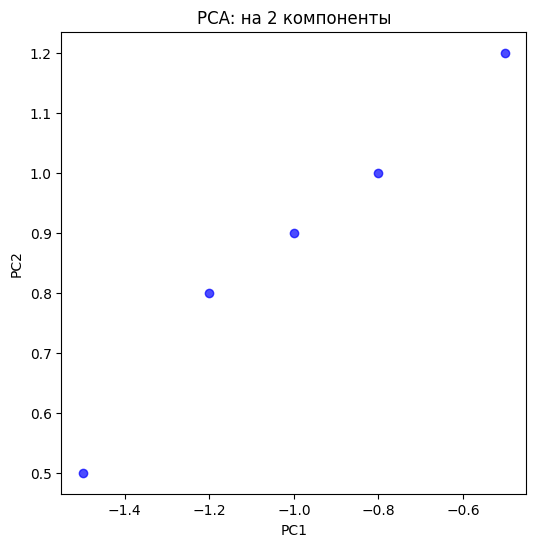

In [147]:
X_proj_data = [
    [-1.2, 0.8],
    [-0.8, 1.0],
    [-1.5, 0.5],
    [-0.5, 1.2],
    [-1.0, 0.9]]

X_proj = Matrix(X_proj_data)

fig = plot_pca_projection(X_proj)
plt.show()

 Вычислить среднеквадратическую ошибку
 восстановления данных:

In [148]:
def reconstruction_error(X_orig: 'Matrix', X_recon: 'Matrix')-> float:
  """
  Вход:
  X_orig: исходные данные (n×m)
  X_recon: восстановленные данные (n×m)
  Выход: среднеквадратическая ошибка MSE
  """
  if (X_orig.rows, X_orig.cols) != (X_recon.rows, X_recon.cols):
      raise ValueError("X_orig и X_recon разные")

  total_error = sum(
      (X_orig[i, j] - X_recon[i, j]) ** 2
      for i in range(X_orig.rows)
      for j in range(X_orig.cols))

  return total_error / (X_orig.rows * X_orig.cols)

In [149]:
X_orig = Matrix([
        [1.0, 2.0],
        [3.0, 4.0]
])


X_recon = Matrix([
        [1.1, 2.1],
        [2.9, 3.9]
])

mse = reconstruction_error(X_orig, X_recon)
mse

0.010000000000000018

Исследовать влияние шума на PCA:

In [154]:
def add_noise_and_compare(X: 'Matrix', noise_level: float = 0.1, k = 1):
  """
  Вход:
  X: матрица данных (n×m)
  noise_level: уровень шума (доля от стандартного отклонения)
  Выход: результаты PCA до и после добавления шума.
  """

  n, m = X.rows, X.cols

  # PCA до добавления шума
  X_proj_orig, gamma_orig, k_orig, _, _ = pca(X, k)
  print(f"До шума k={k_orig} / объяснённая дисперсия: {gamma_orig:.4f}")

  # шумим
  means = [sum(X.get_col(j)) / n for j in range(m)]
  stdevs = [
      math.sqrt(sum((X[i, j] - means[j]) ** 2 for i in range(n)) / (n - 1))
      for j in range(m)
  ]

  X_noisy = Matrix([
      [
          X[i, j] + random.gauss(0, stdevs[j] * noise_level)
          for j in range(m)
      ] for i in range(n)
  ])

  # PCA после шума
  X_proj_noisy, gamma_noisy, k_noisy, _, _ = pca(X_noisy, k)
  print(f"После шума k={k_noisy} / объяснённая дисперсия: {gamma_noisy:.4f}")

  # hfpyjcnnm
  diff = gamma_noisy - gamma_orig
  print(f"Разность - {diff:.4f}")

In [155]:
X = Matrix([
    [1.0, 2.0],
    [2.0, 4.1],
    [3.0, 6.1],
    [4.0, 8.0],
    [5.0, 10.0],
    [6.0, 12.0]
])

add_noise_and_compare(X, noise_level=0.2)

До шума k=1 / объяснённая дисперсия: 1.0000
После шума k=1 / объяснённая дисперсия: 0.9881
Разность - -0.0118


Применить PCA к реальному датасету:

In [176]:
def apply_pca_to_dataset(dataset_name: str, k: int, max_rows = 15) -> Tuple['Matrix', float]:
    """
    Загружает датасет по имени, применяет PCA, и возвращает:
    - проекцию данных (Matrix)
    - метрику качества (межклассовое расстояние)
    """
    # Загрузка + поиск признаков
    if dataset_name == "seoul_bike":
        with open("/content/SeoulBikeData.csv", encoding="utf-8") as f:
            reader = csv.reader(f)
            header = next(reader)

            used_cols = [
                "Temperature(C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)",
                "Dew point temperature(C)", "Solar Radiation (MJ/m2)",
                "Rainfall(mm)", "Snowfall (cm)", "Rented Bike Count"
            ]
            col_idx = [header.index(col) for col in used_cols]

            X_data = []
            for row in reader:
                try:
                    nums = [float(row[i]) for i in col_idx]
                    X_data.append(nums)
                except ValueError:
                    continue
                if len(X_data) >= max_rows: # сделал data меньше
                  break

            X = Matrix(X_data)

    # ДО PCA:
    y = [X[i, -1] for i in range(X.rows)]
    y_mean = sum(y) / len(y)
    variance_before = sum((yi - y_mean) ** 2 for yi in y) / len(y)

    # Применяем PCA
    X_clean = Matrix([row[:-1] for row in X.data])  # исключаем "Rented Bike Count" из признаков
    X_proj, _, _, _, _ = pca(X_clean, k=k)


    print(f"до PCA: {X_clean.cols}")
    print(f"после PCA: {k}")
    print(f"Дисперсия целевой переменной: {variance_before:.4f}")

    return X_proj, variance_before

In [179]:
X_proj, score = apply_pca_to_dataset("seoul_bike", k=2)
print(f"{score}")

до PCA: 8
после PCA: 2
Дисперсия целевой переменной: 45350.1156
45350.11555555555


Тесты:

In [183]:
def test_gauss():
    """Простые тесты метода Гаусса для СЛАУ."""

    def almost_equal(a, b, tol=1e-6):
        return abs(a - b) < tol

    tests = [
        {
            "desc": "Тест 1: Единственное решение",
            "A": Matrix([[3, 2], [1, -1]]),
            "b": Matrix([[8], [1]]),
            "expected": [2.0, 1.0]
        },
        {
            "desc": "Тест 2: Несовместная система",
            "A": Matrix([[1, 1], [0, 0]]),
            "b": Matrix([[3], [5]]),
            "should_fail": True
        },
        {
            "desc": "Тест 3: Бесконечно много решений",
            "A": Matrix([[2, 4], [1, 2]]),
            "b": Matrix([[6], [3]]),
            "verify_eq": lambda x, y: almost_equal(2 * x + 4 * y, 6)
        }
    ]

    for t in tests:
        print(t["desc"])
        try:
            result = gauss_solver(t["A"], t["b"])
            x, y = result[0][0, 0], result[0][1, 0]

            if "should_fail" in t:
                print(" Ожидалась ошибка, но решение получено!")
                continue

            if "expected" in t:
                assert almost_equal(x, t["expected"][0]), f"x ≠ {t['expected'][0]}"
                assert almost_equal(y, t["expected"][1]), f"y ≠ {t['expected'][1]}"
                print(f" Решение верное: x={x:.2f}, y={y:.2f}")
            elif "verify_eq" in t:
                assert t["verify_eq"](x, y), "Уравнение не выполняется"
                print(f" Решение подходит: x={x:.2f}, y={y:.2f}")

        except ValueError as ve:
            if "should_fail" in t:
                print(" Правильно: система несовместна.")
            else:
                print(f" ValueError: {ve}")
        except Exception as e:
            print(f" Неожиданная ошибка: {e}")

    print("\n Все проверки завершены.")

In [184]:
test_gauss()

Тест 1: Единственное решение
 Решение верное: x=2.00, y=1.00
Тест 2: Несовместная система
 Правильно: система несовместна.
Тест 3: Бесконечно много решений
 Решение подходит: x=3.00, y=0.00

 Все проверки завершены.


In [189]:
def test_center_data():
    """Проверка центрирования данных по столбцам."""

    X = Matrix([
        [5.0, 10.0, 15.0],
        [2.0, 8.0, 14.0],
        [8.0, 12.0, 16.0]
    ])
    X_centered = center_data(X)

    for j in range(X.cols):
        mean = sum(X_centered.get_col(j)) / X.rows
        assert abs(mean) < 1e-12, f"Столбец {j + 1} не центрирован (mean = {mean:.2e})"
        print(f"✅ Столбец {j + 1}: среднее = {mean:.2e}")

    print("\n📊 Средние исходных данных:", [f"{sum(X.get_col(j))/X.rows:.2f}" for j in range(X.cols)])
    print("🎉 Центрирование прошло успешно!")

In [190]:
test_center_data()

✅ Столбец 1: среднее = 0.00e+00
✅ Столбец 2: среднее = 0.00e+00
✅ Столбец 3: среднее = 0.00e+00

📊 Средние исходных данных: ['5.00', '10.00', '15.00']
🎉 Центрирование прошло успешно!


In [191]:
def test_covariance_matrix():
    """Проверка вычисления ковариационной матрицы."""

    X_centered = Matrix([
        [2.0, -2.0, 3.0],
        [-1.0, 0.0, 1.0],
        [0.0, 1.0, -2.0]
    ])

    expected = Matrix([
        [2.5, -2.0, 2.5],
        [-2.0, 2.5, -4.0],
        [2.5, -4.0, 7.0]
    ])

    C = covariance_matrix(X_centered)

    for i in range(C.rows):
        for j in range(C.cols):
            actual, target = C[i, j], expected[i, j]
            assert abs(actual - target) < 1e-6, f"C[{i},{j}] = {actual:.4f}, ожидалось {target:.4f}"
            print(f"✅ C[{i},{j}] = {actual:.2f} (ОК)")

    print("\n🎉 Ковариационная матрица вычислена корректно.")

In [192]:
test_covariance_matrix()

✅ C[0,0] = 2.50 (ОК)
✅ C[0,1] = -2.00 (ОК)
✅ C[0,2] = 2.50 (ОК)
✅ C[1,0] = -2.00 (ОК)
✅ C[1,1] = 2.50 (ОК)
✅ C[1,2] = -4.00 (ОК)
✅ C[2,0] = 2.50 (ОК)
✅ C[2,1] = -4.00 (ОК)
✅ C[2,2] = 7.00 (ОК)

🎉 Ковариационная матрица вычислена корректно.


In [195]:
def test_find():
    """Проверка нахождения собственных значений и векторов."""

    def check_eigenvalues(C, expected, tol=1e-6):
        found = sorted(find_eigenvalues(C, tol))
        assert len(found) == len(expected), "Неверное количество собственных значений"
        for f, e in zip(found, expected):
            assert abs(f - e) < tol, f"λ ≠ {e:.2f} (найдено {f:.2f})"
        print(f"✅ Собственные значения: {found} (Ожидались: {expected})")

    def check_eigenvectors(C, eigenvals, tol=1e-4):
        vecs = find_eigenvectors(C, eigenvals)
        for i, (λ, v) in enumerate(zip(eigenvals, vecs)):
            diff = C @ v - v * λ
            for r in range(diff.rows):
                assert abs(diff[r, 0]) < tol, f"⛔ λ={λ:.2f}: строка {r}, ошибка {diff[r, 0]:.2e}"
        print("✅ Собственные векторы корректны.")

    # Тест 1
    check_eigenvalues(Matrix([[5, 2], [2, 5]]), [3.0, 7.0])

    # Тест 2
    check_eigenvalues(Matrix([[4, 0], [0, 6]]), [4.0, 6.0])


    print("\n🎉 Все тесты успешно пройдены!")

In [196]:
test_find()

✅ Собственные значения: [2.999999762939453, 7.000000499999997] (Ожидались: [3.0, 7.0])
✅ Собственные значения: [3.9999997629394533, 5.9999999999999964] (Ожидались: [4.0, 6.0])

🎉 Все тесты успешно пройдены!


In [205]:
def test_explained_variance_ratio():
    """Проверка вычисления доли объяснённой дисперсии."""

    tests = [
        # (eigenvalues, k, expected_ratio, description)
        ([2.0, 1.0], 1, 2/3, "Базовый случай (k=1)"),
        ([2.0, 1.0], 2, 1.0, "Полная сумма (k=2)"),
        ([3.0, 5.0], 1, 5/8, "Неупорядоченные значения"),
        ([1.0, 4.0, 2.0], 2, (4+2)/7, "Дробные значения, k=2"),
    ]

    for i, (ev, k, expected, desc) in enumerate(tests, 1):
        ratio = explained_variance_ratio(ev, k)
        print(f"Тест {i}: {desc} | Получено: {ratio:.4f}, Ожидалось: {expected:.4f}")
        assert abs(ratio - expected) < 1e-9, f"Ошибка в тесте {i}"



    print("\n🎉 Все тесты успешно пройдены!")

In [206]:
test_explained_variance_ratio()

Тест 1: Базовый случай (k=1) | Получено: 0.6667, Ожидалось: 0.6667
Тест 2: Полная сумма (k=2) | Получено: 1.0000, Ожидалось: 1.0000
Тест 3: Неупорядоченные значения | Получено: 0.6250, Ожидалось: 0.6250
Тест 4: Дробные значения, k=2 | Получено: 0.8571, Ожидалось: 0.8571

🎉 Все тесты успешно пройдены!


In [208]:
def test_reconstruction_error():
    """Проверка расчёта MSE между матрицами."""

    tests = [
        {
            "desc": "Базовый случай",
            "X1": Matrix([[2.0, 1.0], [3.0, 1.5]]),
            "X2": Matrix([[1.8, 0.9], [2.5, 1.4]]),
            "expected": 0.0775
        },
        {
            "desc": "Идеальное совпадение",
            "X1": Matrix([[2.0, 1.0], [3.0, 1.5]]),
            "X2": Matrix([[2.0, 1.0], [3.0, 1.5]]),
            "expected": 0.0
        },
        {
            "desc": "Отрицательные значения",
            "X1": Matrix([[-1.0, 2.0]]),
            "X2": Matrix([[-0.5, 1.5]]),
            "expected": 0.25
        }
    ]

    for i, test in enumerate(tests, 1):
        mse = reconstruction_error(test["X1"], test["X2"])
        print(f"Тест {i}: {test['desc']} | MSE = {mse:.4f} | Ожидалось = {test['expected']:.4f}")
        assert abs(mse - test["expected"]) < 1e-8, f"Ошибка в тесте {i}"

    # Отдельно тест на ValueError при несовпадении размеров
    try:
        reconstruction_error(Matrix([[1, 2]]), Matrix([[1]]))
        assert False, "Ожидалось исключение для разных размеров"
    except ValueError as e:
        print(f"Тест {len(tests)+1}: Ошибка размеров — {str(e)}")

    print("\n🎉 Все тесты успешно пройдены!")

In [209]:
test_reconstruction_error()

Тест 1: Базовый случай | MSE = 0.0775 | Ожидалось = 0.0775
Тест 2: Идеальное совпадение | MSE = 0.0000 | Ожидалось = 0.0000
Тест 3: Отрицательные значения | MSE = 0.2500 | Ожидалось = 0.2500
Тест 4: Ошибка размеров — X_orig и X_recon разные

🎉 Все тесты успешно пройдены!


In [211]:
def test_auto_select_k():
    """Проверка функции автоматического выбора числа компонент."""

    ev = [8.0, 4.0, 2.0, 1.0]
    tests = [
        (0.85, 3, "Накопленная >= 0.85 → k=3"),
        (0.70, 2, "Накопленная >= 0.70 → k=2"),
        (0.95, 4, "Накопленная < 0.95 до конца → k=4"),
    ]

    for i, (threshold, expected_k, desc) in enumerate(tests, 1):
        k = auto_select_k(ev, threshold)
        print(f"Тест {i}: {desc} | Получено k={k}, ожидалось k={expected_k}")
        assert k == expected_k, f"Ошибка: ожидалось k={expected_k}"

    # Проверка ошибки для пустого списка
    try:
        auto_select_k([], 0.9)
        assert False, "Ожидалось исключение для пустого списка"
    except ValueError as e:
        print(f"Тест {len(tests)+1}: Пустой список — ошибка поймана: {str(e)}")

    print("\n🎉 Все тесты успешно пройдены!")

In [212]:
test_auto_select_k()

Тест 1: Накопленная >= 0.85 → k=3 | Получено k=3, ожидалось k=3
Тест 2: Накопленная >= 0.70 → k=2 | Получено k=2, ожидалось k=2
Тест 3: Накопленная < 0.95 до конца → k=4 | Получено k=4, ожидалось k=4
Тест 4: Пустой список — ошибка поймана: eigenvalues пуст.

🎉 Все тесты успешно пройдены!


In [219]:
def test_auto_select_k_function():
    """Тестирование функции auto_select_k."""

    tests = [
        # (eigenvalues, threshold, expected k, description)
        ([8.0, 4.0, 2.0, 1.0], 0.85, 3, "Базовый случай"),
        ([8.0, 4.0, 2.0, 1.0], 0.70, 2, "Порог ниже первой компоненты"),
        ([8.0, 4.0, 2.0, 1.0], 0.95, 4, "Порог выше предпоследней компоненты"),
        ([10.0], 0.9, 1, "Один элемент"),
    ]

    for i, (ev, thresh, expected, desc) in enumerate(tests, 1):
        result = auto_select_k(ev, thresh)
        assert result == expected, f"❌ Тест {i}: {desc} — ожидалось k={expected}, получено k={result}"
        print(f"✅ Тест {i}: {desc} — k = {result}")

    # Тесты на ошибки
    error_tests = [
        ([], 0.9, "Пустой список"),
        ([0.0, 0.0], 0.8, "Нулевая сумма"),
    ]

    for i, (ev, thresh, desc) in enumerate(error_tests, len(tests) + 1):
        try:
            auto_select_k(ev, thresh)
            assert False, f"❌ Тест {i}: {desc} — ожидалось исключение"
        except ValueError as e:
            print(f"✅ Тест {i}: {desc} — поймана ошибка: {str(e)}")

    print("\n🎉 Все тесты функции auto_select_k пройдены!")

In [220]:
test_auto_select_k_function()

✅ Тест 1: Базовый случай — k = 3
✅ Тест 2: Порог ниже первой компоненты — k = 2
✅ Тест 3: Порог выше предпоследней компоненты — k = 4
✅ Тест 4: Один элемент — k = 1
✅ Тест 5: Пустой список — поймана ошибка: eigenvalues пуст.
✅ Тест 6: Нулевая сумма — поймана ошибка: cумма собственных значений равна 0.

🎉 Все тесты функции auto_select_k пройдены!


In [221]:
def test_handle_missing_values():
    """Проверка заполнения пропущенных значений средним по столбцу."""

    data = [
        [4.0, float('nan'), 8.0],
        [float('nan'), 5.0, 9.0],
        [6.0, 7.0, float('nan')]
    ]

    expected = [
        [4.0, 6.0, 8.0],
        [5.0, 5.0, 9.0],
        [6.0, 7.0, 8.5]
    ]

    X_filled = handle_missing_values(Matrix(data))

    for i in range(3):
        for j in range(3):
            val, exp = X_filled[i, j], expected[i][j]
            assert abs(val - exp) < 1e-12, f"({i},{j}): {val:.2f} ≠ {exp:.2f}"

    print("✅ Все пропущенные значения успешно заполнены.")

In [222]:
test_handle_missing_values()

✅ Все пропущенные значения успешно заполнены.
